## Report


##### Import the libraries
+ import numpy as np 
+ import pandas as pd
+ import matplotlib.pyplot as plt
+ import seaborn as sns
+ import tensorflow
+ from tensorflow import keras
+ from keras.models import  Sequential
+ from keras.layers import Dense, Dropout
+ from sklearn.preprocessing import StandardScaler
+ from sklearn.metrics import accuracy_score
+ from mlxtend.plotting import plot_decision_regions


#### Loading the dataset
+ Check the dataset
+ Check the info of data


#### Check the  spead of datapoint using vizualization

#### Performing train test split and Building MLP
+ Identify the Input and Output
+ Segregate the data into train and test part
+ perform preprocessing step
+ perform fit transform on train data and transform on test data


#### Important Steps in MLP
##### Create the Architecture using Sequencial
+ Crete the model 
+ specify the no of nurons and activation function like relu, sigmoid and tanh
+ Specify the input dimension

##### Model Compilation 
+ Specify the Optimizer
+ loss function:
  + For Regression: MSE, MAE, Huber loss
  + For Classification: Binary cross entropy, Categorical cross entropy
+ Specify Metrics as accuracy

##### Training the model
+ fit the X_train_trans and y_train in the model means leaning the patterns, relationship between input and output
+ Specify the batch size
+ specify the epochs and validation_split

##### MLP Evaluation and Plotting decision surfaces
+ check the prediction of X_test_trans
+ check the accuracy score
+ Try to compair the loss and val_loss using vizualization so can understand the underfitting and overfitting
+ plot the decision surface of X_train_trans, y_train
+ plot the decision surface of X_test_trans, y_test

Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout


Loading the dataset

In [ ]:
df = pd.read_csv(r"E:\Excel_files\Deep Learning\demo_data/1.ushape.csv", header = None)

In [ ]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


Plotting the datapoints to identify shape

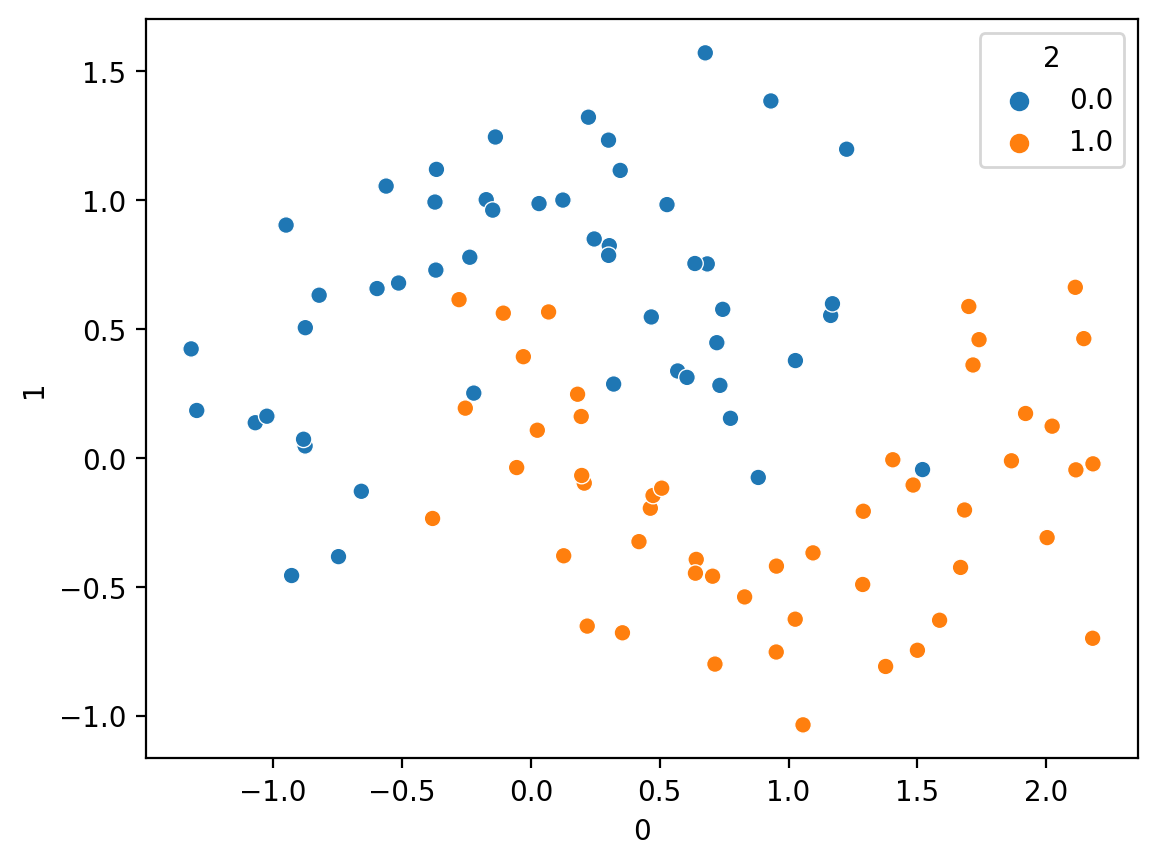

In [ ]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [ ]:
X = df[[0,1]]
y = df[2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans=std.fit_transform(X_train)

In [ ]:
X_test_trans = std.transform(X_test)

In [ ]:
model = Sequential()


model.add(Dense(10,activation='relu', input_dim = 2))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


Model Compilation and Training

In [ ]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_trans,y_train,batch_size =10, epochs =300 ,validation_split = 0.2)

Epoch 1/300
7/7 [==============================] - 2s 55ms/step - loss: 0.7174 - accuracy: 0.5938 - val_loss: 0.6789 - val_accuracy: 0.4375
Epoch 2/300
7/7 [==============================] - 0s 13ms/step - loss: 0.6973 - accuracy: 0.6406 - val_loss: 0.6558 - val_accuracy: 0.5000
Epoch 3/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6795 - accuracy: 0.6562 - val_loss: 0.6357 - val_accuracy: 0.6250
Epoch 4/300
7/7 [==============================] - 0s 11ms/step - loss: 0.6639 - accuracy: 0.6406 - val_loss: 0.6159 - val_accuracy: 0.6250
Epoch 5/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6491 - accuracy: 0.6250 - val_loss: 0.5980 - val_accuracy: 0.6250
Epoch 6/300
7/7 [==============================] - 0s 11ms/step - loss: 0.6365 - accuracy: 0.6406 - val_loss: 0.5804 - val_accuracy: 0.6250
Epoch 7/300
7/7 [==============================] - 0s 11ms/step - loss: 0.6212 - accuracy: 0.6719 - val_loss: 0.5661 - val_accuracy: 0.7500
Epoch 8/300
7/7 [===

MLP Evaluation and Plotting decision surfaces

In [ ]:
Y_cap = model.predict(X_test_trans)

1/1 [==============================] - 0s 448ms/step


In [ ]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [ ]:
Y_cap_f

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.95

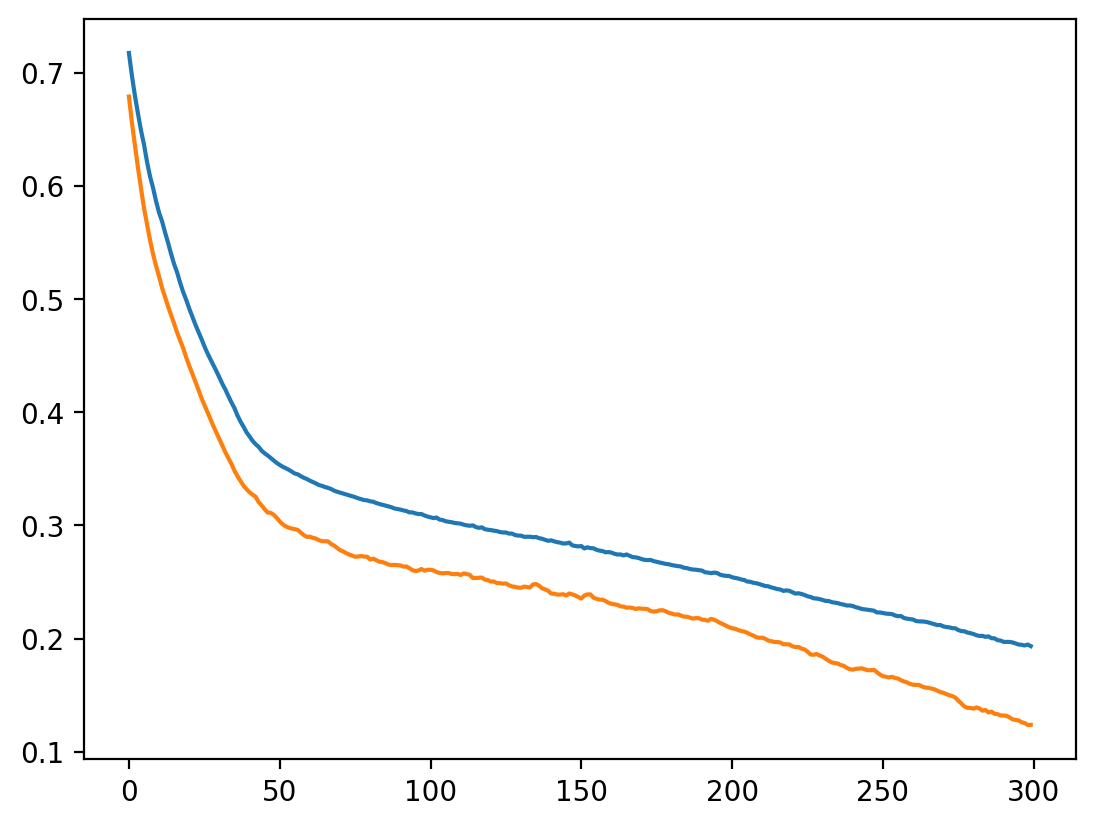

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [3]:

#!pip install mlxtend --upgrade

In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 24s 3ms/step


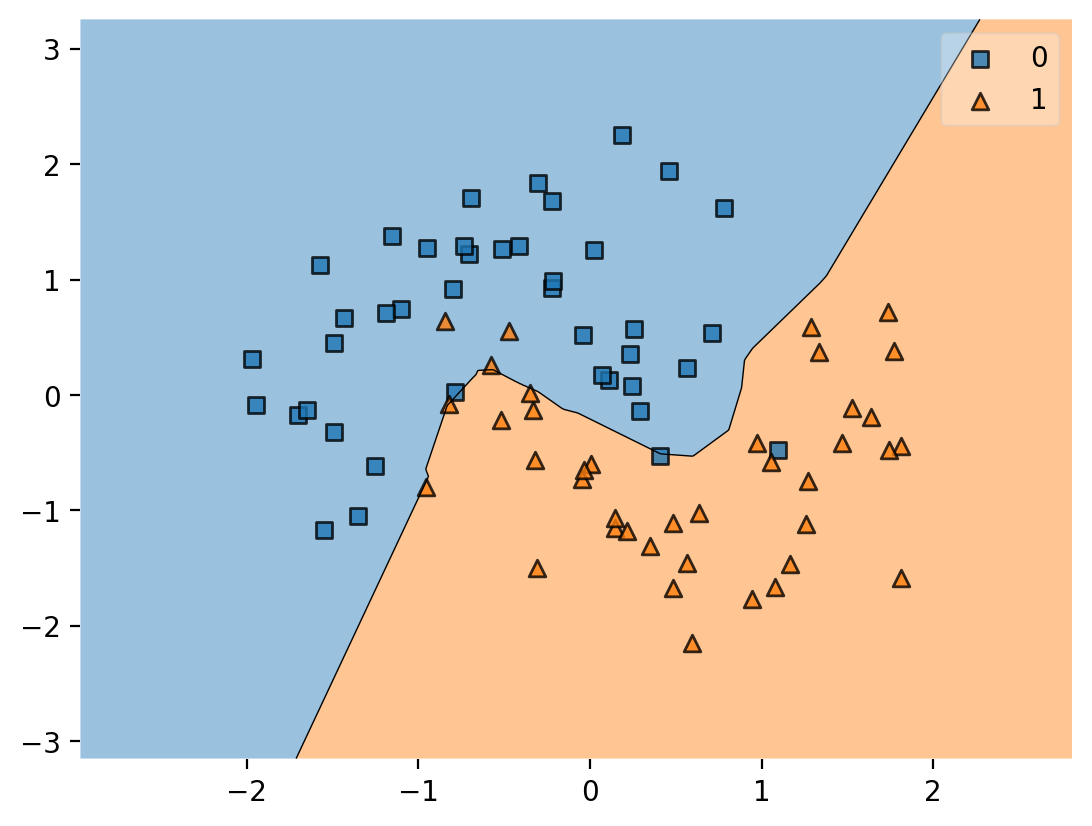

In [ ]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 25s 3ms/step


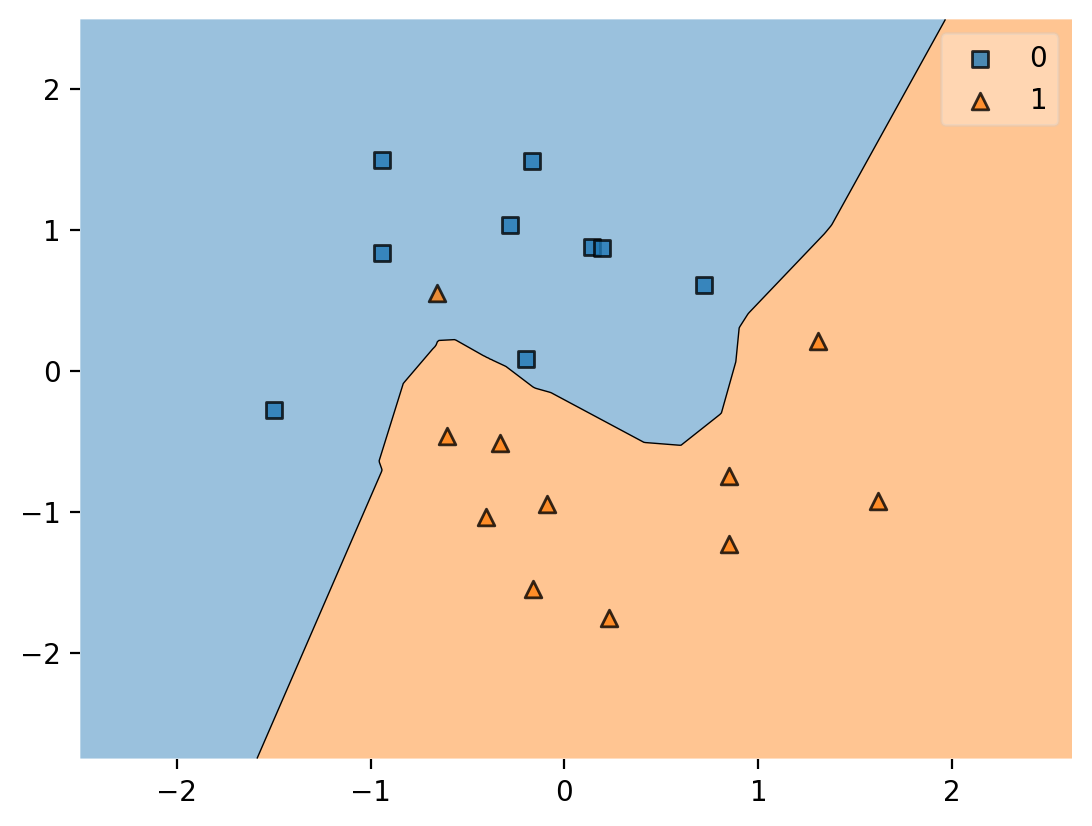

In [ ]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);

### Accuracy : 95.00%